# Minería de Texto

_Text Mining_ o  Minería de Texto es el análisis de información no estructurada, la cual utiliza técnicas de lingüística, modelamientos estadísticos y técnicas de aprendizaje para descubrir conocimientos que no existen explícitamente en ningún texto de la colección, pero que surgen al relacionar el contenido de muchos de ellos.

**Algunos Tipos de Textos Analizados**
- Encuestas de opinión.
- Encuestas de satisfacción del cliente.
- Libros de Reclamaciones.
- Entrevistas semi-abiertas en estudios de clientes.
- Vigilia tecnológica: resúmenes de artículos científicos contenidos en las bases científicas, patentes, ...

**Algunos Beneficios**
- Identificar “hechos” y datos puntuales a partir del texto de los documentos.
- Agrupar documentos similares (clustering).
- Determinar el tema o temas tratados en los documentos mediante la categorización automática de los textos.
- Identificar los conceptos tratados en los documentos y crear redes de conceptos.
- Facilitar el acceso a la información repartida entre los documentos de la colección, mediante la elaboración automática de resúmenes, y la visualización de las relaciones entre los conceptos tratados en la colección.
- Visualización y navegación de colecciones de texto.

**Algunas técnicas**
- **La extracción de Términos**, es la técnica más básica que identifica los términos clave y entidades lógicas (nombres de las organizaciones, lugares, fechas y valores financieros entre otros). La estructura de datos más simple en la minería de texto es el vector de características, una lista de las palabras ponderadas que aparecen en un texto.

- **La extracción de Información**, se basa en los términos extraídos del texto para identificar las relaciones básicas. La extracción de información se centra en un conjunto de hechos que constituyen un evento, episodio, o estado.

- **El Análisis Relacional**, combina múltiples vínculos para formar modelos de varios pasos de procesos complejos. Es un conjunto de técnicas que permite tener una idea de las relaciones entre varias entidades con múltiples conexiones, pasos, o enlaces.

- **Clasificación**
- **Análisis del Cluster**, 
- entre otras.

Empecemos con algunos conceptos y procesos que son necesarios antes de llevar a cabo cualquier análisis de textos.

## Vectorización

Representación de palabras como vectores encontradas en los textos de documentos. 

Source: https://rare-technologies.com/word2vec-tutorial/



In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# http://qwone.com/~jason/20Newsgroups/
noticias = fetch_20newsgroups(subset="train")

In [2]:
noticias.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [3]:
len(noticias.data[0])

721

In [4]:
noticias.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Bag of Words

El modelo "**bolsa de palabras**" del inglés _Bag of Words_ (BOW) es un método que se utiliza en el procesado del lenguaje para representar documentos ignorando el orden de las palabras. En este modelo, cada documento parece una bolsa que contiene algunas palabras. Por lo tanto, este método permite un modelado de las palabras basado en diccionarios, donde cada bolsa contiene unas cuantas palabras del diccionario. 

In [6]:
# Para crear una bolsa de palabras podemos utilizar varios metodos, 
# aqui se presenta el utilizado con scikit-learn utilizando la función "CountVectorizer"
# from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()
# Ejecutamos la función por medio del ajuste de los datos
vector.fit(noticias.data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [5]:
print(vector.vocabulary_)

{'from': 56979, 'lerxst': 75358, 'wam': 123162, 'umd': 118280, 'edu': 50527, 'where': 124031, 'my': 85354, 'thing': 114688, 'subject': 111322, 'what': 123984, 'car': 37780, 'is': 68532, 'this': 114731, 'nntp': 87620, 'posting': 95162, 'host': 64095, 'rac3': 98949, 'organization': 90379, 'university': 118983, 'of': 89362, 'maryland': 79666, 'college': 40998, 'park': 92081, 'lines': 76032, '15': 4605, 'was': 123292, 'wondering': 124931, 'if': 65798, 'anyone': 28615, 'out': 90774, 'there': 114579, 'could': 42876, 'enlighten': 51793, 'me': 80638, 'on': 89860, 'saw': 104813, 'the': 114455, 'other': 90686, 'day': 45295, 'it': 68766, 'door': 48618, 'sports': 109581, 'looked': 76718, 'to': 115475, 'be': 32311, 'late': 74693, '60s': 16574, 'early': 50111, '70s': 18299, 'called': 37433, 'bricklin': 34995, 'doors': 48620, 'were': 123796, 'really': 99822, 'small': 108252, 'in': 66608, 'addition': 26073, 'front': 56989, 'bumper': 35612, 'separate': 106116, 'rest': 101378, 'body': 34181, 'all': 2743

In [7]:
bolsa = vector.transform(noticias.data)

bolsa.shape

(11314, 130107)

In [8]:
bolsa_y = noticias.target

Xe, Xt, ye, yt = train_test_split(bolsa, bolsa_y)

lr = LogisticRegression()
lr.fit(Xe,ye)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
lr.score(Xt,yt)

0.89254153411099324

## Procesamiento y análisis de textos

Para llevar a cabo el análisis de documentos, es necesario seguir algunos pasos para el tratamiento de los textos y su posterior inclusión en los modelos de aprendizaje automático.

Existe una rama de la inteligencia artificial bien conocida llamada **Procesamiento del lenguaje natural** o NLP por sus siglas en Inglés.

### ¿Que son los NLP?
El procesamiento de lenguajes naturales — o del inglés Natural Language Processing— es un campo de las ciencias de la computación, inteligencia artificial y lingüística que estudia las interacciones entre las computadoras y el lenguaje humano. El NLP se ocupa de la formulación e investigación de mecanismos eficaces computacionalmente para la comunicación entre personas y máquinas por medio de lenguajes naturales. Los modelos aplicados se enfocan no solo a la comprensión del lenguaje de por sí, sino a aspectos generales cognitivos humanos y a la organización de la memoria. El lenguaje natural sirve solo de medio para estudiar estos fenómenos. Hasta la década de 1980, la mayoría de los sistemas de NLP se basaban en un complejo conjunto de reglas diseñadas a mano.

### ¿Por que utilizar NLP?
- La mayoría del conocimiento creado por humanos esta en textos no estructurados.
- Se necesita alguna forma de darle sentido
- Permite el análisis cuantitativo de datos de texto

Ahora bien, hoy día existen varias herramientas que nos facilitan el análisis y procesamiento de textos de una manera mas agíl, entre ellos podriamos mencionar librerias como NLTK, Gensim, entre otras.

Aquí mostrareoms el uso de NLTK por su alta calidad y funcionalidad NLP reusable


### Procesamiento utilizando NLTK

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, and an active discussion forum.

Library documentation: http://www.nltk.org/


In [12]:
# necesario para desplegar los gráficos
%matplotlib inline

# Se importa la librería y se descargarn los datos de ejemplo
import nltk
# nltk.download('all') 
# Esto puede ocupar bastante espacio ver detalles en http://nltk.github.com/nltk_data/

# Una vez importados los datos podemos cargar los datos de ejemplo de Libros
from nltk.book import *


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [13]:
# Podemos examinar algunas concordancias (palabra + contexto)
# Ej. del Documento o texto 1 traiga todas las citas o líneas con la palabra "monstrous"
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [14]:
text1.similar("monstrous") # Encontrar similitudes

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [15]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


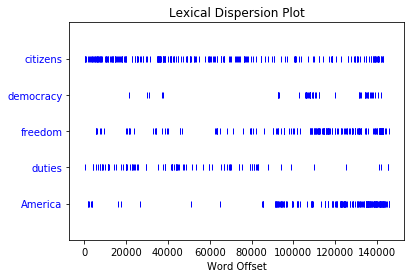

In [16]:
# ver en algún texto o documento ciertas palabras ocurren
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [17]:
# Contar todos los tokens (palabras) (incluyendo las puntuaciones)
len(text3)

44764

In [18]:
# Cantidad de tokens distintos 
len(set(text3))

2789

In [19]:
# Los textos son listas de carácteres o palabras
text2[141525:]

['among',
 'the',
 'merits',
 'and',
 'the',
 'happiness',
 'of',
 'Elinor',
 'and',
 'Marianne',
 ',',
 'let',
 'it',
 'not',
 'be',
 'ranked',
 'as',
 'the',
 'least',
 'considerable',
 ',',
 'that',
 'though',
 'sisters',
 ',',
 'and',
 'living',
 'almost',
 'within',
 'sight',
 'of',
 'each',
 'other',
 ',',
 'they',
 'could',
 'live',
 'without',
 'disagreement',
 'between',
 'themselves',
 ',',
 'or',
 'producing',
 'coolness',
 'between',
 'their',
 'husbands',
 '.',
 'THE',
 'END']

In [20]:
# Construir una Distribucción de Frecuencias
fdist1 = FreqDist(text1) 
fdist1

FreqDist({'[': 3,
          'Moby': 84,
          'Dick': 84,
          'by': 1137,
          'Herman': 1,
          'Melville': 1,
          '1851': 3,
          ']': 1,
          'ETYMOLOGY': 1,
          '.': 6862,
          '(': 210,
          'Supplied': 2,
          'a': 4569,
          'Late': 1,
          'Consumptive': 1,
          'Usher': 2,
          'to': 4542,
          'Grammar': 2,
          'School': 1,
          ')': 78,
          'The': 612,
          'pale': 18,
          '--': 1070,
          'threadbare': 1,
          'in': 3916,
          'coat': 28,
          ',': 18713,
          'heart': 90,
          'body': 110,
          'and': 6024,
          'brain': 37,
          ';': 4072,
          'I': 2124,
          'see': 253,
          'him': 1058,
          'now': 646,
          'He': 230,
          'was': 1632,
          'ever': 203,
          'dusting': 2,
          'his': 2459,
          'old': 436,
          'lexicons': 1,
          'grammars': 2,
          '

In [21]:
# Obtener los 20 mas comunes o las 20 palabras que mas se repiten en el texto
fdist1.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

In [24]:
# Cuantas veces se repite
fdist1['whale']

906

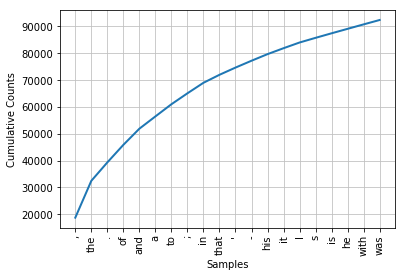

In [25]:
# Gráficar una curva de frecuencias de los 20 palabras que mas se repiten
fdist1.plot(20, cumulative=True)

In [26]:
# Aplicar una función para obtener una lista de las palabras con más de 15 carácteres
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [27]:
# Similar para el texto 5 con palabras de mas de 7 carácteres
fdist2 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist2[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

In [28]:
# Secuencia de palabras que usualmente aparecen a menudo juntas 
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


### Procesamiento de texto crudo

In [36]:
# Descargar texto crudo de un repositorio en línea
from urllib.request import urlopen
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = urlopen(url)
raw = response.read().decode('utf8') # Necesario decodificarlo para que conserver los acentos claros
len(raw)

1176965

In [42]:
# Visualizar los primeros 75 carácteres
raw[:75]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r'

### Tokenization

Tokenization is the process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens.The list of tokens becomes input for further processing such as parsing or text mining.Tokenization is useful both in linguistics (where it is a form of text segmentation), and in computer science, where it forms part of lexical analysis.

**¿Para que usar?**:  
Separa el texto en unidades como oraciones o palabras

**Por que?**:
Da estructura a los datos de texto previamente no estructurados

**Notas**:
Es relativamente facil con textos en lenguaje Inglés, y no tan facil con otros lenguajes

In [43]:
# tokenizar los textos crudos
from nltk import word_tokenize
tokens = word_tokenize(raw)
len(tokens)

257726

In [44]:
# Obtenga los 10 primeros tokens
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [45]:
# Forma de obtener el texto a partir de los tokens
text = nltk.Text(tokens)
text[1024:1062]

['an',
 'exceptionally',
 'hot',
 'evening',
 'early',
 'in',
 'July',
 'a',
 'young',
 'man',
 'came',
 'out',
 'of',
 'the',
 'garret',
 'in',
 'which',
 'he',
 'lodged',
 'in',
 'S.',
 'Place',
 'and',
 'walked',
 'slowly',
 ',',
 'as',
 'though',
 'in',
 'hesitation',
 ',',
 'towards',
 'K.',
 'bridge',
 '.',
 'He',
 'had',
 'successfully']

In [46]:
# Collecciones de Textos
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project
Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


In [47]:
# Buscar por algún texto en particular
raw.find("PART I")

5336

### Otro ejemplo de vectorización o tokenization

In [121]:
'''
Tokenization

What:  Separate text into units such as sentences or words
Why:   Gives structure to previously unstructured text
Notes: Relatively easy with English language text, not easy with some languages
'''

# "corpus" = collection of documents
# "corpora" = plural form of corpus

import requests
from bs4 import BeautifulSoup
r = requests.get("http://en.wikipedia.org/wiki/Data_science")
b = BeautifulSoup(r.text, "lxml")
paragraphs = b.find("body").findAll("p")
text = ""
for paragraph in paragraphs:
    text += paragraph.text + " "
# Data Science corpus
text[:500]

# tokenize into sentences
sentences = [sent for sent in nltk.sent_tokenize(text)]
sentences[:10]

# tokenize into words
tokens = [word for word in nltk.word_tokenize(text)]
tokens[:100]

# only keep tokens that start with a letter (using regular expressions)
import re
clean_tokens = [token for token in tokens if re.search('^[a-zA-Z]+', token)]
clean_tokens[:100]

# count the tokens
from collections import Counter
c = Counter(clean_tokens)
c.most_common(25)       # mixed case
sorted(c.items())[:25]  # counts similar words separately
for item in sorted(c.items())[:25]:
    print(item[0], item[1])

ASA 1
Action 1
Additionally 1
Advanced 2
Although 1
American 2
An 1
Analysis 2
Analytics 3
April 2
Areas 1
Association 3
August 1
Because 1
Big 1
Board 1
Business 2
C. 1
C.F 1
CODATA 1
Carver 1
Century 3
Chandra 1
Chikio 1
Classification 1


### Proceso de textos crudos provenientes de internet o con formato HTML

In [53]:
# Para eliminar etiquetas de HTML utilizamos la librería Beautiful Soup
from bs4 import BeautifulSoup
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = urlopen(url).read().decode('utf8') # urllib2.urlopen
raw = BeautifulSoup(html, 'lxml').get_text()
tokens = word_tokenize(raw)
tokens[0:10]

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in']

In [54]:
# aislar o separar simplemente el texto del articulo
tokens = tokens[110:390]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


### Utilizando expresiones regulares

In [55]:
# Cargamos la libreria y obtenemos una lista de palabras en minúsculas
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [56]:
# Encontrar las 10 primeras palabras que terminan en "ed"
[w for w in wordlist if re.search('ed$', w)][0:10]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded']

In [57]:
# Comodín que encaje en cualquier carácter 
# Ej palabras con las letras j y t separdas por 2 carácteres atras y adelante
[w for w in wordlist if re.search('^..j..t..$', w)][0:10]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector']

In [58]:
# Combinación del simbolo ^ (caret) al comienzo de la palabra y el juego de carácteres
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

In [59]:
# Ejemplo con el simbolo + para encajas cualquier número de veces que se repita
# Usamos otro juego de palabras
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [60]:
# Ejemplo un poco mas avanzado para obtener textos con solo números
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)][0:10]

['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5']

In [61]:
# Obtener Solo textos en mayusculas del juego de palabras anterior
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

['C$', 'US$']

In [62]:
# Obtener los 10 primeros textos de 4 carácteres que representen números
[w for w in wsj if re.search('^[0-9]{4}$', w)][0:10]

['1614',
 '1637',
 '1787',
 '1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934']

In [63]:
# Obtener los 10 primeros textos que empiecen con numero separado de guión 
# y texto de 3 a 5 carácteres
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)][0:10]

['10-day',
 '10-lap',
 '10-year',
 '100-share',
 '12-point',
 '12-year',
 '14-hour',
 '15-day',
 '150-point',
 '190-point']

In [64]:
# Buscar hasta 10 palabras en minusculas sin números de mínimo 5 letras mas un guión seguido de una
# palabra de 2 a 3 carácteres y luego un guión y una palabra de máximo 6 letras
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)][0:10]

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

In [65]:
# Buscar hasta 10 palabras que terminen en ed o ing
[w for w in wsj if re.search('(ed|ing)$', w)][0:10]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything']

In [66]:
# uso de "findall" para extraer carácteres que encajen en algunas palabras
# ejemplo palabras que tengan dos vócales seguidas 
fd = nltk.FreqDist(vs for word in wsj 
                      for vs in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

### Normalización de textos

In linguistic morphology and information retrieval, stemming is the process for reducing inflected (or sometimes derived) words to their stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; _it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root_. Algorithms for stemming have been studied in computer science since the 1960s. Many search engines treat words with the same stem as synonyms as a kind of query expansion, a process called conflation

**¿Que es?**: 
Reduce una palabra a su base (stem) o forma normal

**Por que usar?**:
A menudo tiene sentido tratar multiples formas de palabras de la misma manera

**Notas**: 
- Usa un simple y rápido método basado en reglas
- Los resultados podrian ser no deseables para palabras irregulares
- Palabras en su forma normal no son usulamente mostradas al usuario, son utilizadas para análisis e indexación
- Algunos buscadores tratan las palabras con el mismo tallo o base normal como sinonimos.


In [67]:
# NLTK tiene varias funciones para la normalización de los textos
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [68]:
# 
[porter.stem(t) for t in tokens][0:10]

['UK',
 'blond',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'scientist',
 'believ']

In [69]:
[lancaster.stem(t) for t in tokens][0:10]

['uk', 'blond', "'to", 'die', 'out', 'in', '200', "years'", 'sci', 'believ']

In [70]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens][0:10]

['UK',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'Scientists',
 'believe']

In [75]:
# also has a tokenizer that takes a regular expression as a parameter
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)    # set flag to allow verbose regexps 
    ([A-Z]\.)+        # abbreviations, e.g. U.S.A.
    | \w+(-\w+)*        # words with optional internal hyphens
    | \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
    | \.\.\.            # ellipsis
    | [][.,;"'?():-_`]  # these are separate tokens; includes ], [
   '''
nltk.regexp_tokenize(text, pattern)

[('', '', ''),
 ('A.', '', ''),
 ('', '-print', ''),
 ('', '', ''),
 ('', '', '.40'),
 ('', '', '')]

### Otro ejemplo de Stemming

In [122]:
'''
Stemming
What:  Reduce a word to its base/stem form
Why:   Often makes sense to treat multiple word forms the same way
Notes: Uses a "simple" and fast rule-based approach
       Output can be undesirable for irregular words
       Stemmed words are usually not shown to users (used for analysis/indexing)
       Some search engines treat words with the same stem as synonyms
'''

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

# example stemming
stemmer.stem('charge')
stemmer.stem('charging')
stemmer.stem('charged')

# stem the tokens
stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]

# count the stemmed tokens
c = Counter(stemmed_tokens)
c.most_common(25)       # all lowercase
sorted(c.items())[:25]  # some are strange

[('a', 24),
 ('about', 2),
 ('academ', 1),
 ('action', 1),
 ('activ', 1),
 ('actual', 1),
 ('ad', 1),
 ('addit', 1),
 ('address', 1),
 ('advanc', 3),
 ('advantag', 1),
 ('advoc', 1),
 ('advocaci', 1),
 ('after', 1),
 ('all', 1),
 ('alon', 1),
 ('also', 1),
 ('although', 1),
 ('american', 2),
 ('an', 4),
 ('analysi', 6),
 ('analyst', 2),
 ('analyt', 6),
 ('analyz', 1),
 ('and', 49)]

### Etiquetado o Tagging

In grammar, a part of speech (also a word class, a lexical class, or a lexical category) is a linguistic category of words (or more precisely lexical items), which is generally defined by the syntactic or morphological behaviour of the lexical item in question. Common linguistic categories include noun and verb, among others.There are open word classes, which constantly acquire new members, and closed word classes, which acquire new members infrequently if at all.
 
Almost all languages have the lexical categories noun and verb, but beyond these there are significant variations in different languages. For example,Japanese has as many as three classes of adjectives where English has one; Chinese, Korean and Japanese have nominal classifiers whereas European languages do not; many languages do not have a distinction between adjectives and adverbs, adjectives and verbs (see stative verbs) or adjectives and nouns, etc.This variation in the number of categories and their identifying properties entails that analysis be done for each individual language. Nevertheless the labels for each category are assigned on the basis of universal criteria.

What:  Determine the part of speech of a word

Why:   This can inform other methods and models such as Named Entity Recognition

Notes: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [76]:
# Define por medio de una etiqueta el tipo de palabra usada en el texto
# Use a built-in tokenizer and tagger
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [77]:
# Word similarity using a pre-tagged text
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [78]:
# Tagged words are saved as tuples
nltk.corpus.brown.tagged_words()[0:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [79]:
nltk.corpus.brown.tagged_words(tagset='universal')[0:10]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP')]

In [80]:
# Cantidad de tipos de palabras mas comunes
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [81]:
# Número de palabras etiquetadas que siguen la palabra "often" en el texto
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [83]:
# Almacenar algunos textos para etiquetar
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

# Default tagger (Asignar la misma etiqueta a cada token)
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [84]:
# Evaluar el rendimiento contra un juego de textos etiquetados
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

In [85]:
# Entrenar un etiquetador de unigrama
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [86]:
# Ahora evaluemos el etiquetador
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [87]:
# Combinando varios etiquetadores
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(brown_tagged_sents, backoff=t0)
t2 = nltk.BigramTagger(brown_tagged_sents, backoff=t1)
t2.evaluate(brown_tagged_sents)

0.9731487558923564

### Clasificando Texto

In [88]:
# Definir una función de extracción
# ej. obtener la última letra de una palabra
def gender_features(word):
        return {'last_letter': word[-1]}
gender_features('Shrek')

{'last_letter': 'k'}

In [89]:
# Preparar la lista con los ejemplos de nombres masculinos y femeninos
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
    [(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)

In [90]:
# Procesar los datos de nombres
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [91]:
# Validar el clasificador con algunos textos
classifier.classify(gender_features('Neo'))

'male'

In [92]:
classifier.classify(gender_features('Trinity'))

'female'

In [93]:
classifier.classify(gender_features('Ernesto'))

'male'

In [96]:
classifier.classify(gender_features('Sarah'))

'female'

In [97]:
# Precisión del clasificador
print(nltk.classify.accuracy(classifier, test_set))

0.764


In [98]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     34.7 : 1.0
             last_letter = 'k'              male : female =     29.5 : 1.0
             last_letter = 'f'              male : female =     16.4 : 1.0
             last_letter = 'p'              male : female =     12.4 : 1.0
             last_letter = 'v'              male : female =     11.1 : 1.0


In [99]:
# Classificación de Documentos
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [101]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [109]:
word_features = all_words.keys() #[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [120]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.85


In [ ]:
classifier.show_most_informative_features(5)

### Lemmatization

In [123]:
'''
Lemmatization
What:  Derive the canonical form ('lemma') of a word
Why:   Can be better than stemming, reduces words to a 'normal' form.
Notes: Uses a dictionary-based approach (slower than stemming)
'''
lemmatizer = nltk.WordNetLemmatizer()

# compare stemmer to lemmatizer
stemmer.stem('dogs')
lemmatizer.lemmatize('dogs')

stemmer.stem('wolves') # Beter for information retrieval and search
lemmatizer.lemmatize('wolves') # Better for text analysis

stemmer.stem('is')
lemmatizer.lemmatize('is')
lemmatizer.lemmatize('is',pos='v')

'be'

### Stopword Removal

In [124]:
'''
Stopword Removal
What:  Remove common words that will likely appear in any text
Why:   They don't tell you much about your text
'''

# most of top 25 stemmed tokens are "worthless"
c.most_common(25)

# view the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
sorted(stopwords)

# stem the stopwords
stemmed_stops = [stemmer.stem(t) for t in stopwords]

# remove stopwords from stemmed tokens
stemmed_tokens_no_stop = [stemmer.stem(t) for t in stemmed_tokens if t not in stemmed_stops]
c = Counter(stemmed_tokens_no_stop)
most_common_stemmed = c.most_common(25)

# remove stopwords from cleaned tokens
clean_tokens_no_stop = [t for t in clean_tokens if t not in stopwords]
c = Counter(clean_tokens_no_stop)
most_common_not_stemmed = c.most_common(25)

# Compare the most common results for stemmed words and non stemmed words
for i in range(25):
    text_list = most_common_stemmed[i][0] + '  ' + str(most_common_stemmed[i][1]) + ' '*25
    text_list = text_list[0:30]
    text_list += most_common_not_stemmed[i][0] + '  ' + str(most_common_not_stemmed[i][1])
    print(text_list)

data  62                      data  39
scienc  39                    Data  23
statist  19                   science  23
term  12                      In  16
scientist  11                 Science  16
method  7                     term  12
comput  7                     Statistical  8
busi  7                       The  7
use  7                        scientists  7
intern  7                     methods  6
analysi  6                    statistics  6
analyt  6                     business  5
confer  6                     used  5
journal  6                    International  5
field  5                      analysis  4
publish  5                    many  4
lectur  5                     conference  4
mine  4                       first  4
mani  4                       Journal  4
job  4                        field  3
univ  4                       information  3
first  4                      computer  3
statistician  4               Review  3
big  4                        Century  3
area  3      

### Named Entity Recognition

In [125]:
'''
Named Entity Recognition
What:  Automatically extract the names of people, places, organizations, etc.
Why:   Can help you to identify "important" words
Notes: Training NER classifier requires a lot of annotated training data
       Should be trained on data relevant to your task
       Stanford NER classifier is the "gold standard"
'''

def extract_entities(text):
    entities = []
    # tokenize into sentences
    for sentence in nltk.sent_tokenize(text):
        # tokenize sentences into words
        # add part-of-speech tags
        # use NLTK's NER classifier
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        # parse the results
        entities.extend([chunk for chunk in chunks if hasattr(chunk, 'label')])
    return entities

for entity in extract_entities('Kevin and Sinan are instructors for General Assembly in Washington, D.C.'):
    print('[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves()))

[PERSON] Kevin
[PERSON] Sinan
[ORGANIZATION] General Assembly
[GPE] Washington


### Term Frequency - Inverse Document Frequency -- TF-IDF
tf–idf, term frequency–inverse document frequency, is a numerical statistic which reflects how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval and text mining.The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to control for the fact that some words are generally more common than others.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification. One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

In [126]:
'''
Term Frequency - Inverse Document Frequency (TF-IDF)
What:  Computes "relative frequency" that a word appears in a document
           compared to its frequency across all documents
Why:   More useful than "term frequency" for identifying "important" words in
           each document (high frequency in that document, low frequency in
           other documents)
Notes: Used for search engine scoring, text summarization, document clustering
'''

sample = ['Bob likes sports', 'Bob hates sports', 'Bob likes likes trees']

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit_transform(sample).toarray()
vect.get_feature_names()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(sample).toarray()
tfidf.get_feature_names()

['bob', 'hates', 'likes', 'sports', 'trees']

### LDA - Latent Dirichlet Allocation

In natural language processing, Latent Dirichlet Allocation (LDA) is a generative model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's creation is attributable to one of the document's topics. LDA is an example of a topic model and was first presented as a graphical model for topic discovery by David Blei,Andrew Ng, and Michael Jordan in 2003.


In [127]:
'''
LDA - Latent Dirichlet Allocation
What:  Way of automatically discovering topics from sentences
Why:   Much quicker than manually creating and identifying topic clusters
'''
# pip install lda
import lda
import numpy as np

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(sentences)

# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))

INFO:lda:n_documents: 39
INFO:lda:vocab_size: 1497
INFO:lda:n_words: 1874
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -21343
INFO:lda:<10> log likelihood: -18323
INFO:lda:<20> log likelihood: -17960
INFO:lda:<30> log likelihood: -17810
INFO:lda:<40> log likelihood: -17714
INFO:lda:<50> log likelihood: -17501
INFO:lda:<60> log likelihood: -17337
INFO:lda:<70> log likelihood: -17437
INFO:lda:<80> log likelihood: -17392
INFO:lda:<90> log likelihood: -17270
INFO:lda:<100> log likelihood: -17311
INFO:lda:<110> log likelihood: -17232
INFO:lda:<120> log likelihood: -17235
INFO:lda:<130> log likelihood: -17222
INFO:lda:<140> log likelihood: -17375
INFO:lda:<150> log likelihood: -17347
INFO:lda:<160> log likelihood: -17280
INFO:lda:<170> log likelihood: -17097
INFO:lda:<180> log likelihood: -17228
INFO:lda:<190> log likelihood: -17282
INFO:lda:<200> log likelihood: -17379
INFO:lda:<210> log likelihood: -17221
INFO:lda:<220> log likelihood: -17258
INFO:lda:<230> log l

Topic 0: university, business, definition, buzzword, society, business analytics, issues, applications, programs
Topic 1: data, science, analytics, data science, conference, international, launched, 2015, conference data
Topic 2: data, science, data science, statistics, methods, statistics data, published, lecture, statistics data science
Topic 3: information, data driven, systems, digital, driven, technology, data mining databases, activity, activity conduct
Topic 4: statistical, data, science, analysis, mining, data mining, association, journal, learning
Topic 5: journal, collection, indian, mahalanobis, data collection, research, lectures, methods quantitative, term statistician additionally
Topic 6: scientist, data scientist, term, statistician, century, review, 21st, 21st century, sexiest job 21st
Topic 7: areas, field, computing data, computing, article, technical, technical areas, cleveland, field statistics
Topic 8: term, term data, term data science, computer, used, computer s

### EXAMPLE: Automatically summarize a document

In [128]:
'''
EXAMPLE: Automatically summarize a document
'''

# corpus of 2000 movie reviews
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(filename) for filename in movie_reviews.fileids()]

# create document-term matrix
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(reviews)
features = tfidf.get_feature_names()

# find the most and least "interesting" sentences in a randomly selected review
def summarize():
    # choose a random movie review    
    review_id = np.random.randint(0, len(reviews))
    review_text = reviews[review_id]

    # we are going to score each sentence in the review for "interesting-ness"
    sent_scores = []
    # tokenize document into sentences
    for sentence in nltk.sent_tokenize(review_text):
        # exclude short sentences
        if len(sentence) > 6:
            score = 0
            token_count = 0
            # tokenize sentence into words
            tokens = nltk.word_tokenize(sentence)
            # compute sentence "score" by summing TF-IDF for each word
            for token in tokens:
                if token in features:
                    score += dtm[review_id, features.index(token)]
                    token_count += 1
            # divide score by number of tokens
            sent_scores.append((score / float(token_count + 1), sentence))

    # lowest scoring sentences
    print('\nLOWEST:\n')
    for sent_score in sorted(sent_scores)[:3]:
        print (sent_score[1])

    # highest scoring sentences
    print('\nHIGHEST:\n')
    for sent_score in sorted(sent_scores, reverse=True)[:3]:
        print (sent_score[1])

# try it out!
summarize()


LOWEST:

well , it's not .
well , it is far from spectacular , and it makes independence day look brilliant .
give me a break , will ya ?

HIGHEST:

on another note , leder's film only picks up its pace during the last fifteen minutes when the comet actually impacts .
of course , leder isn't all to blame for it .
now , of course , we all know that the comet does impact the surface .


### Simplified Text Processing

In [129]:
'''
TextBlob Demo: "Simplified Text Processing"
Installation: pip install textblob
'''
from textblob import TextBlob, Word

# identify words and noun phrases
blob = TextBlob('Kevin and Sinan are instructors for General Assembly in Washington, D.C.')
blob.words
blob.noun_phrases

# sentiment analysis
blob = TextBlob('I hate this horrible movie. This movie is not very good.')
blob.sentences
blob.sentiment.polarity
[sent.sentiment.polarity for sent in blob.sentences]

# sentiment subjectivity
TextBlob("I am a cool person").sentiment.subjectivity # Pretty subjective
TextBlob("I am a person").sentiment.subjectivity # Pretty objective
# different scores for essentially the same sentence
print(TextBlob('Kevin and Sinan are instructors for General Assembly in Washington, D.C.').sentiment.subjectivity)
print(TextBlob('Kevin and Sinan are instructors in Washington, D.C.').sentiment.subjectivity)

# singularize and pluralize
blob = TextBlob('Put away the dishes.')
[word.singularize() for word in blob.words]
[word.pluralize() for word in blob.words]

# spelling correction
blob = TextBlob('15 minuets late')
blob.correct()

# spellcheck
Word('parot').spellcheck()

# definitions
Word('bank').define()
Word('bank').define('v')

# translation and language identification
blob = TextBlob('Welcome to the classroom.')
print(blob.translate(to='es'))
blob = TextBlob('Hola amigos')
blob.detect_language()

0.5
0.0
Bienvenido al salón de clases.


'es'

### Data Science Toolkit Sentiment

In [130]:
'''
Data Science Toolkit Sentiment
Provides many different APIs for converting and getting information
We'll use the text2sentiment API.
'''
# Import the necessary modules
import requests
import json

# Sample sentences
sentences = ['I love Sinan!', 'I hate Sinan!', 'I feel nothing about Sinan!']
# API endpoint (i.e.the URL they ask you to send your text to)
url = 'http://www.datasciencetoolkit.org/text2sentiment/'

# Loop through the sentences
for sentence in sentences:
    payload = {'text': sentence} # The sentence we want the sentiment of 
    headers = {'content-type': 'application/json'} # The type of data you are sending
    r = requests.post(url, data=json.dumps(payload), headers=headers) # Send the data
    print (sentence, json.loads(r.text)['score']) # Print the results

I love Sinan! 3.0
I hate Sinan! -3.0
I feel nothing about Sinan! 0


### Uso de la librería Gensim 
Gensim is a free Python library designed to automatically extract semantic topics from documents, as efficiently (computer-wise) and painlessly (human-wise) as possible.

Gensim aims at processing raw, unstructured digital texts (“plain text”). The algorithms in gensim, such as Latent Semantic Analysis, Latent Dirichlet Allocation or Random Projections, discover semantic structure of documents, by examining word statistical co-occurrence patterns within a corpus of training documents. These algorithms are unsupervised, which means no human input is necessary – you only need a corpus of plain text documents.

Once these statistical patterns are found, any plain text documents can be succinctly expressed in the new, semantic representation, and queried for topical similarity against other documents.

Library documentation: https://radimrehurek.com/gensim/index.html


In [132]:
from gensim import corpora, models, similarities
# This is a tiny corpus of nine documents, each consisting of only a single sentence.
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

In [134]:
# Quitar palabras comunes y vectorizar
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

In [135]:
# Remueva palabras que aperecen solo una vez
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

In [136]:
from pprint import pprint
pprint(texts)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


Your way of processing the documents will likely vary; here, I only split on whitespace to tokenize, followed by lowercasing each word. In fact, I use this particular (simplistic and inefficient) setup to mimic the experiment done in [Deerwester et al.’s original LSA article](http://www.cs.bham.ac.uk/~pxt/IDA/lsa_ind.pdf) (Table 2).

The ways to process documents are so varied and application- and language-dependent that I decided to not constrain them by any interface. Instead, a document is represented by the features extracted from it, not by its “surface” string form: how you get to the features is up to you. Below I describe one common, general-purpose approach (called bag-of-words), but keep in mind that different application domains call for different features, and, as always, [it’s garbage in, garbage out](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out)...

To convert documents to vectors, we’ll use a document representation called [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model). In this representation, each document is represented by one vector where a vector element i represents the number of times the ith word appears in the document.

It is advantageous to represent the questions only by their (integer) ids. The mapping between the questions and ids is called a dictionary:


In [138]:
# Crear un diccionario para relacionar palabras unicas con identificadores
dictionary = corpora.Dictionary(texts)
print(dictionary)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(12 unique tokens: ['human', 'interface', 'computer', 'survey', 'user']...) from 9 documents (total 29 corpus positions)


Dictionary(12 unique tokens: ['human', 'interface', 'computer', 'survey', 'user']...)


Here we assigned a unique integer ID to all words appearing in the processed corpus with the [gensim.corpora.dictionary.Dictionary](https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary) class. This sweeps across the texts, collecting word counts and relevant statistics. In the end, we see there are twelve distinct words in the processed corpus, which means each document will be represented by twelve numbers (ie., by a 12-D vector). To see the mapping between words and their ids:

In [139]:
# relación entre ids y las palabras
print(dictionary.token2id)

{'human': 0, 'interface': 1, 'computer': 2, 'survey': 3, 'user': 4, 'system': 5, 'response': 6, 'time': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}


In [ ]:
# guardar el diccionario en el disco para usos posteriores
# dictionary.save(os.path.join(TEMP_FOLDER, 'deerwester.dict'))

To actually convert tokenized documents to vectors:

In [156]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)  # the word "interaction" does not appear in the dictionary and is ignored

[(0, 1), (2, 1)]


The function doc2bow() simply counts the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a bag-of-words--a sparse vector, in the form of [(word_id, word_count), ...].

As the token_id is 0 for "human" and 2 for "computer", the new document “Human computer interaction” will be transformed to [(0, 1), (2, 1)]. The words "computer" and "human" exist in the dictionary and appear once. Thus, they become (0, 1), (2, 1) respectively in the sparse vector. The word "interaction" doesn't exist in the dictionary and, thus, will not show up in the sparse vector. The other ten dictionary words, that appear (implicitly) zero times, will not show up in the sparse vector and , ,there will never be a element in the sparse vector like (3, 0).

For people familiar with scikit learn, doc2bow() has similar behaviors as calling transform() on [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). doc2bow() can behave like fit_transform() as well. For more details, please look at [gensim API](https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.doc2bow) Doc.


In [140]:
# Convertir el texto en una bolsa de palabras o BOW (bag-of-words corpus)
corpus = [dictionary.doc2bow(text) for text in texts]
# corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'deerwester.mm'), corpus)  # store to disk, for later use
pprint(corpus)

[[(0, 1), (1, 1), (2, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(1, 1), (4, 1), (5, 1), (8, 1)],
 [(0, 1), (5, 2), (8, 1)],
 [(4, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(3, 1), (10, 1), (11, 1)]]


By now it should be clear that the vector feature with id=10 represents the number of times the word "graph" occurs in the document. The answer is “zero” for the first six documents and “one” for the remaining three. As a matter of fact, we have arrived at exactly the same corpus of vectors as above. If you're running this notebook yourself the word IDs may differ, but you should be able to check the consistency between documents comparing their vectors.

In [141]:
# Se puede utilizar para convertir las matrices en formato numpy
from gensim import matutils
numpy_matrix = matutils.corpus2dense(corpus, num_terms=12)
print(numpy_matrix)

[[ 1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  2.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.]]


In [ ]:
scipy_csc_matrix = matutils.corpus2csc(corpus)
numpy_corpus = matutils.Dense2Corpus(numpy_matrix)
scipy_corpus = matutils.Sparse2Corpus(scipy_csc_matrix)

In [143]:
# Inicializa una transformación de TF-IDF
tfidf = models.TfidfModel(corpus)

INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.models.tfidfmodel:calculating IDF weights for 9 documents and 11 features (28 matrix non-zeros)


In [144]:
# Aplicarlo a todos los documentos
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]
[(2, 0.44424552527467476), (3, 0.44424552527467476), (4, 0.3244870206138555), (5, 0.3244870206138555), (6, 0.44424552527467476), (7, 0.44424552527467476)]
[(1, 0.5710059809418182), (4, 0.4170757362022777), (5, 0.4170757362022777), (8, 0.5710059809418182)]
[(0, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)]
[(4, 0.45889394536615247), (6, 0.6282580468670046), (7, 0.6282580468670046)]
[(9, 1.0)]
[(9, 0.7071067811865475), (10, 0.7071067811865475)]
[(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)]
[(3, 0.6282580468670046), (10, 0.45889394536615247), (11, 0.6282580468670046)]


In [146]:
# Inicializar un modelo de transformación LSI
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)
lsi.print_topics(2)

INFO:gensim.models.lsimodel:using serial LSI version on this node
INFO:gensim.models.lsimodel:updating model with new documents
INFO:gensim.models.lsimodel:preparing a new chunk of documents
INFO:gensim.models.lsimodel:using 100 extra samples and 2 power iterations
INFO:gensim.models.lsimodel:1st phase: constructing (12, 102) action matrix
INFO:gensim.models.lsimodel:orthonormalizing (12, 102) action matrix
INFO:gensim.models.lsimodel:2nd phase: running dense svd on (12, 9) matrix
INFO:gensim.models.lsimodel:computing the final decomposition
INFO:gensim.models.lsimodel:keeping 2 factors (discarding 47.565% of energy spectrum)
INFO:gensim.models.lsimodel:processed documents up to #9
INFO:gensim.models.lsimodel:topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"time" + 0.060*"response" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
INFO:gensim.models.lsimodel:topic #1(1.476): 0.460*"system" + 0.373*"user" + 0.332*"eps" + 0.32

[(0,
  '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"time" + 0.060*"response" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'),
 (1,
  '0.460*"system" + 0.373*"user" + 0.332*"eps" + 0.328*"interface" + 0.320*"time" + 0.320*"response" + 0.293*"computer" + 0.280*"human" + 0.171*"survey" + -0.161*"trees"')]

In [147]:
# Crear una doble envoltura sobre el corpus original: bow->tfidf->lsi
corpus_lsi = lsi[corpus_tfidf]
for doc in corpus_lsi:
    print(doc)

[(0, 0.066007833960903886), (1, 0.52007033063618524)]
[(0, 0.19667592859142477), (1, 0.76095631677000553)]
[(0, 0.089926399724464395), (1, 0.72418606267525099)]
[(0, 0.075858476521781779), (1, 0.63205515860034289)]
[(0, 0.10150299184980065), (1, 0.57373084830029641)]
[(0, 0.70321089393783132), (1, -0.16115180214025826)]
[(0, 0.87747876731198327), (1, -0.16758906864659429)]
[(0, 0.90986246868185761), (1, -0.14086553628719012)]
[(0, 0.61658253505692784), (1, 0.053929075663894099)]


In [148]:
# Modelo de proyección aleatorio
rp = models.RpModel(corpus_tfidf, num_topics=500)

INFO:gensim.models.rpmodel:no word id mapping provided; initializing from corpus, assuming identity
INFO:gensim.models.rpmodel:constructing (500, 12) random matrix


In [149]:
# latent dirichlet allocation model
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=100)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.01
INFO:gensim.models.ldamodel:using symmetric eta at 0.08333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 9 documents, updating model once every 9 documents, evaluating perplexity every 9 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-124.899 per-word bound, 39661696218359805080458455032482758656.0 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #9/9
INFO:gensim.models.ldamodel:topic #64 (0.010): 0.083*"time" + 0.083*"system" + 0.083*"graph" + 0.083*"trees" + 0.083*"eps" + 0.083*"human" + 0.083*"response" + 0.083*"computer" + 0.083*"survey" + 0.083*"interface"
INFO:gensim.models.ldamodel:topic #28 (0.010): 0.083*"time" + 0.083*"system" + 0.083*"grap

In [150]:
# Convertir una frase al modelo LSI
doc = "Human computer interaction"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow] # convert the query to LSI space
print(vec_lsi)

[(0, 0.079104751174448915), (1, 0.57328352430794083)]


In [151]:
# Indice del corpus transformados del anterior
index = similarities.MatrixSimilarity(corpus_lsi)

INFO:gensim.similarities.docsim:creating matrix with 9 documents and 2 features


In [152]:
# Llevar a cabo una consulta de similitud en el corpus usando la Similitud Coseno
sims = index[vec_lsi]
print(list(enumerate(sims)))

[(0, 0.99994081), (1, 0.99330217), (2, 0.99990785), (3, 0.99984384), (4, 0.9992786), (5, -0.08804217), (6, -0.0515742), (7, -0.016480923), (8, 0.22248439)]


In [153]:
# Despliegue la lista en orden descendente
sims = sorted(enumerate(sims), key=lambda item: -item[1])
pprint(sims)

[(0, 0.99994081),
 (2, 0.99990785),
 (3, 0.99984384),
 (4, 0.9992786),
 (1, 0.99330217),
 (8, 0.22248439),
 (7, -0.016480923),
 (6, -0.0515742),
 (5, -0.08804217)]


### Corpus Streaming – Un documento a la vez 

Note que el corpus anterior estaba en la memoria completamente como una lista plana de Python. Esto no siempre es posible. Imaginemos que tenemos millones de documentos, y que no caben en la memoria. Entonces debemos ser poder trabajar con datos que están almacenados en disco duro directamente, y procesar línea por línea de ellos.

Note that corpus above resides fully in memory, as a plain Python list. In this simple example, it doesn’t matter much, but just to make things clear, let’s assume there are millions of documents in the corpus. Storing all of them in RAM won’t do. Instead, let’s assume the documents are stored in a file on disk, one document per line. Gensim only requires that a corpus be able to return one document vector at a time:

In [ ]:
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#import os
#import tempfile
#TEMP_FOLDER = tempfile.gettempdir()
#print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
#from gensim import corpora

# collect statistics about all tokens
dictionary = corpora.Dictionary(line.lower().split() for line in open('data/mycorpus.txt'))
#dictionary = corpora.Dictionary.load(os.path.join(TEMP_FOLDER, 'deerwester.dict'))

class MyCorpus(object):
    def __iter__(self):
        for line in open('data/mycorpus.txt'):
            # assume there's one document per line, tokens separated by whitespace
            yield dictionary.doc2bow(line.lower().split())
            

The assumption that each document occupies one line in a single file is not important; you can design the __iter__ function to fit your input format, whatever that may be - walking directories, parsing XML, accessing network nodes... Just parse your input to retrieve a clean list of tokens in each document, then convert the tokens via a dictionary to their IDs and yield the resulting sparse vector inside __iter__.

In [157]:
corpus_memory_friendly = MyCorpus() # doesn't load the corpus into memory!
print(corpus_memory_friendly)

_corpus_memory_friendly_ is now an object. We didn’t define any way to print it, so print just outputs address of the object in memory. Not very useful. To see the constituent vectors, let’s iterate over the corpus and print each document vector (one at a time):

In [158]:
for vector in corpus_memory_friendly:  # load one vector into memory at a time
    print(vector)

[(0, 1), (1, 1), (2, 1)]
[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
[(1, 1), (4, 1), (5, 1), (8, 1)]
[(0, 1), (5, 2), (8, 1)]
[(4, 1), (6, 1), (7, 1)]
[(9, 1)]
[(9, 1), (10, 1)]
[(9, 1), (10, 1), (11, 1)]
[(3, 1), (10, 1), (11, 1)]


Although the output is the same as for the plain Python list, the corpus is now much more memory friendly, because at most one vector resides in RAM at a time. Your corpus can now be as large as you want.

We are going to create the dictionary from the mycorpus.txt file without loading the entire file into memory. Then, we will generate the list of token ids to remove from this dictionary by querying the dictionary for the token ids of the stop words, and by querying the document frequencies dictionary (dictionary.dfs) for token ids that only appear once. Finally, we will filter these token ids out of our dictionary. Keep in mind that dictionary.filter_tokens (and some other functions such as dictionary.add_document) will call dictionary.compactify() to remove the gaps in the token id series thus enumeration of remaining tokens can be changed.


In [155]:
from six import iteritems
# remove common words and tokenize
stoplist = set('for a of the and to in'.split())

# remove stop words and words that appear only once
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist 
            if stopword in dictionary.token2id]
once_ids = [tokenid for tokenid, docfreq in iteritems(dictionary.dfs) if docfreq == 1]

# remove stop words and words that appear only once
dictionary.filter_tokens(stop_ids + once_ids)
print(dictionary)
print(dictionary.dfs)

Dictionary(12 unique tokens: ['human', 'interface', 'computer', 'survey', 'user']...)
{0: 2, 1: 2, 2: 2, 3: 2, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 2}


And that is all there is to it! At least as far as bag-of-words representation is concerned. Of course, what we do with such a corpus is another question; it is not at all clear how counting the frequency of distinct words could be useful. As it turns out, it isn’t, and we will need to apply a transformation on this simple representation first, before we can use it to compute any meaningful document vs. document similarities. Transformations are covered in the next tutorial, but before that, let’s briefly turn our attention to corpus persistency.

### Ejemplo de Análisis de Sentimientos en Competencia Kaggle

In this tutorial competition, we dig a little "deeper" into sentiment analysis. [Google's Word2Vec](https://code.google.com/p/word2vec/) is a deep-learning inspired method that focuses on the meaning of words. Word2Vec attempts to [understand meaning](http://google-opensource.blogspot.com/2013/08/learning-meaning-behind-words.html) and semantic relationships among words. It works in a way that is similar to deep approaches, such as recurrent neural nets or deep neural nets, but is computationally more efficient. This tutorial focuses on Word2Vec for sentiment analysis.

Sentiment analysis is a challenging subject in machine learning. People express their emotions in language that is often obscured by sarcasm, ambiguity, and plays on words, all of which could be very misleading for both humans and computers. There's another [Kaggle competition](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews) for movie review sentiment analysis. In this tutorial we explore how Word2Vec can be applied to a similar problem.

we rely on an IMDB sentiment analysis data set, which has 100,000 multi-paragraph movie reviews, both positive and negative.

**Acknowledgements**

This dataset was collected in association with the following publication:

Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). "Learning Word Vectors for Sentiment Analysis." _The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)_. ([link](http://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf))

Please email the author of that paper if you use the data for any research applications. The tutorial was developed by Angela Chapman during her summer 2014 internship at Kaggle.

For further info: https://www.kaggle.com/c/word2vec-nlp-tutorial

**Data Set**

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

**File descriptions**

- **labeledTrainData** - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.  
- **testData** - The test set. The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review. Your task is to predict the sentiment for each one. 
- **unlabeledTrainData** - An extra training set with no labels. The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review. 
- **sampleSubmission** - A comma-delimited sample submission file in the correct format.

**Data fields**

- **id** - Unique ID of each review
- **sentiment** - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- **review** - Text of the review


### Leyendo los datos

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('data/movies/labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)
test = pd.read_csv('data/movies/testData.tsv', header=0, delimiter="\t", quoting=3 )

Here, "header=0" indicates that the first line of the file contains column names, "delimiter=\t" indicates that the fields are separated by tabs, and quoting=3 tells Python to ignore doubled quotes, otherwise you may encounter errors trying to read the file.

We can make sure that we read 25,000 rows and 3 columns as follows:

In [162]:
train.shape

(25000, 3)

In [163]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

The three columns are called "id", "sentiment", and "review"  Now that you've read the training set, take a look at a few reviews:

In [161]:
# this will show you the first movie review in the column named "review."
train["review"][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

There are HTML tags such as $<br/>$, abbreviations, punctuation - all common issues when processing text from online.

### Depurar los datos y procesamiento de textos



In [167]:
# Removing HTML Markup: The BeautifulSoup Package
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup             

# Initialize the BeautifulSoup object on a single movie review     
example1 = BeautifulSoup(train["review"][0], "lxml")  

# Print the raw review and then the output of get_text(), for comparison
#print(train["review"][0])
print(example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

Calling get_text() gives you the text of the review, without tags or markup. If you browse the BeautifulSoup documentation, you'll see that it's a very powerful library - more powerful than we need for this dataset. However, it is not considered a reliable practice to remove markup using regular expressions, so even for an application as simple as this, it's usually best to use a package like BeautifulSoup.

Dealing with Punctuation, Numbers and Stopwords: NLTK and regular expressions.

When considering how to clean the text, we should think about the data problem we are trying to solve. For many problems, it makes sense to remove punctuation. On the other hand, in this case, we are tackling a sentiment analysis problem, and it is possible that "!!!" or ":-(" could carry sentiment, and should be treated as words. In this tutorial, for simplicity, we remove the punctuation altogether, but it is something you can play with on your own.

Similarly, in this tutorial we will remove numbers, but there are other ways of dealing with them that make just as much sense. For example, we could treat them as words, or replace them all with a placeholder string such as "NUM".

To remove punctuation and numbers, we will use a package for dealing with regular expressions, called re. The package comes built-in with Python; no need to install anything. For a detailed description of how regular expressions work, see the [package documentation](https://docs.python.org/2/library/re.html#). Now, try the following:

In [168]:
import re
# Use regular expressions to do a find-and-replace
# [] indicates group membership and ^ means "not". 
# In other words, the re.sub() statement above says, "Find anything that is NOT a lowercase 
# letter (a-z) or an upper case letter (A-Z), and replace it with a space."

letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      example1.get_text() )  # The text to search
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

We'll also convert our reviews to lower case and split them into individual words (called "[_tokenization_](http://en.wikipedia.org/wiki/Tokenization)" in NLP lingo):

In [169]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words

Finally, we need to decide how to deal with frequently occurring words that don't carry much meaning. Such words are called "[_stop words_](http://en.wikipedia.org/wiki/Stop_words)"; in English they include words such as "a", "and", "is", and "the". Conveniently, there are Python packages that come with stop word lists built in. Let's import a stop word list from the Python [Natural Language Toolkit (NLTK)](http://www.nltk.org/). You'll need to install the library if you don't already have it on your computer; you'll also need to install the data packages that come with it, as follows:

In [170]:
import nltk
# La siguiente línea esta comentada por que ya se habia descargado anteriormente
#nltk.download()  # Download text data sets, including stop words

Now we can use nltk to get a list of stop words:

In [172]:
from nltk.corpus import stopwords # Import the stop word list
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

This will allow you to view the list of English-language stop words. To remove stop words from our movie review, do:

In [174]:
# Remove stop words from "words"
words = [w for w in words if not w in stopwords.words("english")]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

This looks at each word in our "words" list, and discards anything that is found in the list of stop words.

There are many other things we could do to the data - For example, Porter Stemming and Lemmatizing (both available in NLTK) would allow us to treat "messages", "message", and "messaging" as the same word, which could certainly be useful. However, for simplicity, the tutorial will stop here.

### Putting it all together

Now we have code to clean one review - but we need to clean 25,000 training reviews! To make our code reusable, let's create a function that can be called many times:

In [ ]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))



In [ ]:
#  Author: Angela Chapman
#  Date: 8/6/2014
#
#  This file contains code to accompany the Kaggle tutorial
#  "Deep learning goes to the movies".  The code in this file
#  is for Part 1 of the tutorial on Natural Language Processing.
#
# *************************************** #

import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    # 1. Remove HTML
    review_text = BeautifulSoup(review, "lxml").get_text()
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    # 5. Return a list of words
    return(words)

# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a
    # list of sentences, where each sentence is a list of words
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.decode('utf8').strip())
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list
print("Cleaning and parsing the training set movie reviews...\n")
for i in range( 0, len(train["review"])):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print "Review %d of %d\n" % ( i+1, len(train["review"]) )  
    clean_train_reviews.append(" ".join(review_to_wordlist(train["review"][i], True)))

In [182]:
clean_train_reviews[:1]

['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

In [184]:
# ****** Create a bag of words from the training set
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = "word",   \
                         tokenizer = None,    \
                         preprocessor = None, \
                         stop_words = None,   \
                         max_features = 5000)

In [185]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an array
np.asarray(train_data_features)

# ******* Train a random forest using the bag of words
print ("Training the random forest (this may take a while)...")

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)

# Fit the forest to the training set, using the bag of words as
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )


Training the random forest (this may take a while)...


In [187]:
# Create an empty list and append the clean reviews one by one
clean_test_reviews = []

print ("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,len(test["review"])):
    clean_test_reviews.append(" ".join(review_to_wordlist(test["review"][i], True)))

clean_test_reviews[:1]

Cleaning and parsing the test set movie reviews...



['naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty']

In [188]:
# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
np.asarray(test_data_features)

# Use the random forest to make sentiment label predictions
print ("Predicting test labels...\n")
result = forest.predict(test_data_features)

Predicting test labels...



In [192]:
# Copy the results to a pandas dataframe with an "id" column and a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.head()

# Use pandas to write the comma-separated output file
#output.to_csv(os.path.join(os.path.dirname(__file__), 'data', 'Bag_of_Words_model.csv'), index=False, quoting=3)
output.to_csv(os.path.join('data/movies/Bag_of_Words_model.csv'), index=False, quoting=3)
print ("Wrote results to Bag_of_Words_model.csv")

Wrote results to Bag_of_Words_model.csv


### Creating Features from a Bag of Words (Using scikit-learn)

Now that we have our training reviews tidied up, how do we convert them to some kind of numeric representation for machine learning? One common approach is called a [_Bag of Words_](http://en.wikipedia.org/wiki/Bag-of-words_model). The Bag of Words model learns a vocabulary from all of the documents, then models each document by counting the number of times each word appears. For example, consider the following two sentences:

**Sentence 1**: "The cat sat on the hat"

**Sentence 2**: "The dog ate the cat and the hat"

From these two sentences, our vocabulary is as follows:

{ the, cat, sat, on, hat, dog, ate, and }

To get our bags of words, we count the number of times each word occurs in each sentence. In Sentence 1, "the" appears twice, and "cat", "sat", "on", and "hat" each appear once, so the feature vector for Sentence 1 is:

{ the, cat, sat, on, hat, dog, ate, and }

Sentence 1: { 2, 1, 1, 1, 1, 0, 0, 0 }

Similarly, the features for Sentence 2 are: { 3, 1, 0, 0, 1, 1, 1, 1}

In the IMDB data, we have a very large number of reviews, which will give us a large vocabulary. To limit the size of the feature vectors, we should choose some maximum vocabulary size. Below, we use the 5000 most frequent words (remembering that stop words have already been removed).

We'll be using the feature_extraction module from scikit-learn to create bag-of-words features.

In [193]:
# Creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()

train_data_features.shape

(25000, 5000)

It has 25,000 rows and 5,000 features (one for each vocabulary word).

Note that CountVectorizer comes with its own options to automatically do preprocessing, tokenization, and stop word removal -- for each of these, instead of specifying "None", we could have used a built-in method or specified our own function to use.  See the function documentation for more details. However, we wanted to write our own function for data cleaning in this tutorial to show you how it's done step by step.

Now that the Bag of Words model is trained, let's look at the vocabulary:

In [196]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'adaptation', 'adaptations', 'adapted', 'add', 'added', 'adding', 'addition', 'adds', 'adequate', 'admire', 'admit', 'admittedly', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertising', 'advice', 'advise', 'affair', 'affect', 'affected', 'afford', 'aforementioned', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ages', 'aging', 'ago', 'ag

If you're interested, you can also print the counts of each word in the vocabulary:

In [197]:
#import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
187 afternoon

188 dean
146 dear
1908 death
205 deaths
260 debut
255 decade
177 decades
82 deceased
1157 decent
482 decide
705 decided
546 decides
240 decision
105 decisions
99 dedicated
82 dee
653 deep
177 deeper
320 deeply
107 defeat
95 defend
86 defense
87 defined
117 definite
1580 definitely
83 definition
204 degree
97 del
108 deliberately
157 delight
274 delightful
328 deliver
243 delivered
94 delivering
356 delivers
184 delivery
90 demand
113 demands
89 demented
79 demise
183 demon
192 demons
82 deniro
176 dennis
152 dentist
141 denzel
194 department
210 depicted
82 depicting
172 depiction
90 depicts
99 depressed
226 depressing
129 depression
511 depth
86 der
151 derek
89 descent
330 describe
233 described
102 describes
175 description
250 desert
287 deserve
291 deserved
591 deserves
342 design
206 designed
91 designs
304 desire
91 desired
86 despair
323 desperate
179 desperately
104 desperation
1364 despite
104 destiny
219 destroy
178 destroyed
94 destroying
142 destruction
345 detail
108 deta

186 lisa
585 list
125 listed
331 listen
187 listening
109 lit
468 literally
91 literature
6435 little
1552 live
382 lived
88 lively
1392 lives
1063 living
139 lloyd
116 load
85 loaded
100 loads
877 local
337 location
263 locations
167 locked
79 logan
250 logic
122 logical
106 lol
460 london
87 lone
188 lonely
3449 long
477 longer
4145 look
1010 looked
2483 looking
2413 looks
278 loose
118 loosely
348 lord
123 los
345 lose
140 loser
88 losers
263 loses
220 losing
271 loss
1554 lost
3979 lot
799 lots
124 lou
436 loud
225 louis
90 louise
220 lousy
144 lovable
6454 love
1428 loved
424 lovely
397 lover
291 lovers
404 loves
316 loving
1799 low
214 lower
92 lowest
100 loyal
80 loyalty
143 lucas
262 luck
130 luckily
258 lucky
160 lucy
176 ludicrous
195 lugosi
258 luke
100 lumet
92 lundgren
108 lust
146 lying
278 lynch
104 lyrics
98 macarthur
324 machine
113 machines
102 macy
499 mad
8362 made
162 madness
111 madonna
131 mafia
136 magazine
105 maggie
468 magic
194 magical
261 magnificent
84 mai

179 sleeping
80 slice
93 slick
137 slight
122 slightest
541 slightly
117 sloppy
1131 slow
412 slowly
1646 small
105 smaller
406 smart
289 smile
87 smiling
493 smith
118 smoke
134 smoking
128 smooth
110 snake
84 sneak
97 snl
152 snow
284 soap
101 soccer
582 social
674 society
83 soderbergh
297 soft
162 sold
348 soldier
422 soldiers
120 sole
97 solely
503 solid
100 solo
88 solution
139 solve
299 somebody
757 somehow
2339 someone
5077 something
1218 sometimes
965 somewhat
483 somewhere
1357 son
1008 song
908 songs
149 sons
1222 soon
129 sophisticated
78 sopranos
771 sorry
1472 sort
190 sorts
420 soul
122 souls
1320 sound
175 sounded
97 sounding
645 sounds
764 soundtrack
206 source
472 south
164 southern
118 soviet
755 space
83 spacey
85 spain
281 spanish
107 spare
79 spark
522 speak
405 speaking
202 speaks
2113 special
85 specially
96 species
135 specific
101 specifically
248 spectacular
200 speech
249 speed
137 spell
508 spend
133 spending
187 spends
536 spent
87 spider
154 spielberg
133

272 washington
1457 waste
560 wasted
150 wasting
6973 watch
307 watchable
2236 watched
122 watches
4603 watching
547 water
108 waters
85 watson
173 wave
93 waves
8026 way
236 wayne
804 ways
761 weak
99 weakest
109 wealth
153 wealthy
148 weapon
168 weapons
186 wear
326 wearing
166 wears
114 web
112 website
304 wedding
460 week
207 weekend
202 weeks
139 weight
663 weird
214 welcome
10662 well
251 welles
121 wells
98 wendy
1463 went
272 werewolf
121 wes
476 west
600 western
164 westerns
96 wet
116 whale
732 whatever
85 whats
319 whatsoever
270 whenever
149 whereas
856 whether
280 whilst
1492 white
202 whoever
3078 whole
82 wholly
84 whoopi
986 whose
118 wicked
281 wide
87 widely
155 widmark
105 widow
2140 wife
432 wild
80 wilderness
596 william
344 williams
85 willie
320 willing
92 willis
200 wilson
491 win
274 wind
257 window
102 winds
177 wing
232 winner
348 winning
164 wins
137 winter
105 winters
89 wisdom
359 wise
957 wish
95 wished
154 wishes
85 wishing
234 wit
322 witch
92 witches
8

### Random Forest
At this point, we have numeric training features from the Bag of Words and the original sentiment labels for each feature vector, so let's do some supervised learning! Here, we'll use the Random Forest classifier.  The Random Forest algorithm is included in scikit-learn (Random Forest uses many tree-based classifiers to make predictions, hence the "forest"). 

Below, we set the number of trees to 100 as a reasonable default value. More trees may (or may not) perform better, but will certainly take longer to run. Likewise, the more features you include for each review, the longer this will take.

In [ ]:
# Training the random forest 
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )

### Creating a Submission
All that remains is to run the trained Random Forest on our test set and create a submission file. If you haven't already done so, download testData.tsv from the Data page. This file contains another 25,000 reviews and ids; our task is to predict the sentiment label.

Note that when we use the Bag of Words for the test set, we only call "transform", not "fit_transform" as we did for the training set. In machine learning, you shouldn't use the test set to fit your model, otherwise you run the risk of overfitting. For this reason, we keep the test set off-limits until we are ready to make predictions.

In [ ]:
# Read the test data
# test = pd.read_csv("testData.tsv", header=0, delimiter="\t",  quoting=3 )
# Verify that there are 25,000 rows and 2 columns
test.shape

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

### Using word2vec in Python
Although Word2Vec does not require graphics processing units (GPUs) like many deep learning algorithms, it is compute intensive. Both Google's version and the Python version rely on multi-threading (running multiple processes in parallel on your computer to save time). ln order to train your model in a reasonable amount of time, you will need to install cython (instructions here). Word2Vec will run without cython installed, but it will take days to run instead of minutes.

#### Training and Saving Your Model

With the list of nicely parsed sentences, we're ready to train the model. There are a number of parameter choices that affect the run time and the quality of the final model that is produced. For details on the algorithms below, see the word2vec API documentation as well as the Google documentation. 

- **Architecture**: Architecture options are skip-gram (default) or continuous bag of words. We found that skip-gram was very slightly slower but produced better results.
- Training algorithm: Hierarchical softmax (default) or negative sampling. For us, the default worked well.
- **Downsampling of frequent words**: The Google documentation recommends values between .00001 and .001. For us, values closer 0.001 seemed to improve the accuracy of the final model.
- **Word vector dimensionality**: More features result in longer runtimes, and often, but not always, result in better models. Reasonable values can be in the tens to hundreds; we used 300.
- **Context / window size**: How many words of context should the training algorithm take into account? 10 seems to work well for hierarchical softmax (more is better, up to a point).
- **Worker threads**: Number of parallel processes to run. This is computer-specific, but between 4 and 6 should work on most systems.
- **Minimum word count**: This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored. Reasonable values could be between 10 and 100. In this case, since each movie occurs 30 times, we set the minimum word count to 40, to avoid attaching too much importance to individual movie titles. This resulted in an overall vocabulary size of around 15,000 words. Higher values also help limit run time.

Choosing parameters is not easy, but once we have chosen our parameters, creating a Word2Vec model is straightforward:

In [ ]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print "Training model..."
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

On a dual-core Macbook Pro, this took less than 15 minutes to run using 4 worker threads. However, it will vary depending on your computer. Fortunately, the logging functionality prints informative messages.

If you are on a Mac or Linux system, you can use the "top" command from within Terminal (not from within Python) to see if your system is successfully parallelizing while the model is training. Type > top -o cpu

For further info : https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors

## Gráficando Textos
Para ilustrar un poco los textos, utilizaremos la libreria  de generación de nubes de texto en python llamado [WordCloud](http://amueller.github.io/word_cloud/)

In [199]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


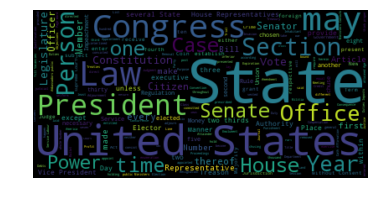

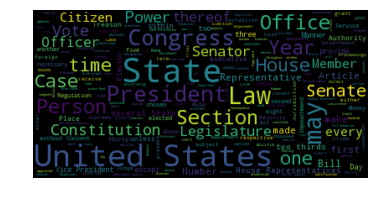

In [203]:
"""
Minimal Example
===============
Generating a square wordcloud from the US constitution using default arguments.
Source: https://github.com/amueller/word_cloud/blob/master/LICENSE
"""
d = path.dirname('/Users/ernestogiron/Desktop/DiplomadoUnivalle_DS2017/statistical_learning/ISLR/data/')

# Read the whole text.
texto = open(path.join(d, 'constitution.txt'), "r").read()

#texto = texto.decode('utf-8')
#texto = texto.encode('ascii', 'ignore')

# Generate a word cloud image
wordcloud = WordCloud().generate(texto)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(texto)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

[< Maquínas de Véctores Soporte - SVM](SVM.ipynb) | [Menú Principal](Aprendizaje%20Estadistico%20y%20Automatico%20con%20Python.ipynb) |